In [57]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, SimpleRNN, LSTM

In [58]:
data = pd.read_csv("/Users/mangodingo/Desktop/VS/Advanced AI/dataset/car.data", header=None)
df = pd.DataFrame(data)

### 데이터 전처리

In [59]:
df.columns =['buying', 
            'maint',
            'doors',
            'persons',
            'lug_boot',
            'safety',
            'class']


In [60]:
#라벨링

from sklearn.preprocessing import LabelEncoder

label=LabelEncoder()


for i in df.columns:
    df[i]=label.fit_transform(df[i])


df

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [61]:
df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

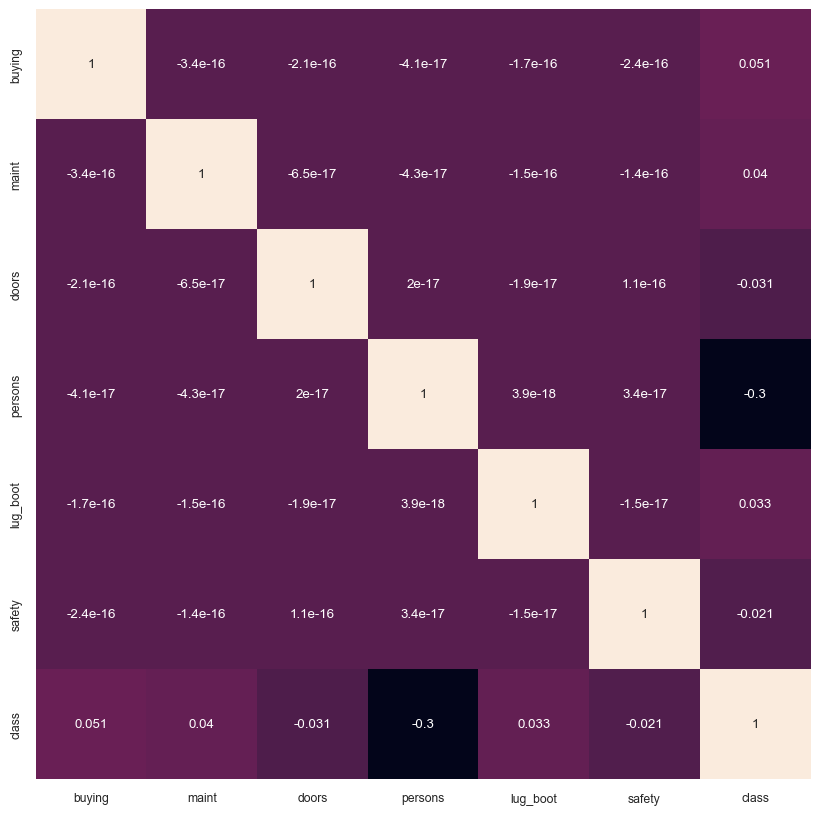

In [62]:
df_corr = df.corr()

plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [63]:
#Splitting the data into training and test test
x = df.drop(['class'], axis=1)
y = df['class']

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y = encoder.fit_transform(y)

from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42) 

In [64]:
# 표준화 진행
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_standardized = scaler.fit_transform(x)

# 표준화된 데이터를 데이터프레임으로 변환
df_standardized = pd.DataFrame(x_standardized, columns=x.columns)
df_standardized['Class'] = y


In [65]:
# 정규화 진행
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x_standardized)

# 정규화된 데이터를 데이터프레임으로 변환
df_normalized = pd.DataFrame(x_normalized, columns=x.columns)
df_normalized['Class'] = y


In [66]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1382, 6), (346, 6), (1382,), (346,))

### 모델 생성

In [67]:
# CNN 모델 생성

cnn_model = Sequential()
cnn_model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(6,1)))
cnn_model.add(Flatten())
cnn_model.add(Dense(16, activation='relu'))   # 은닉층 2
cnn_model.add(Dense(4,activation='softmax'))   # 클래스 수에 맞게 출력층 설정
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [68]:
from keras.callbacks import ModelCheckpoint
from tensorflow import keras

checkpoint = ModelCheckpoint("best_cnn.h5", save_best_only=True, verbose=1, monitor='val_accuracy')

# CNN 모델 학습
cnn_his = cnn_model.fit(x_train, y_train, epochs=50, batch_size=4, validation_data=(x_test, y_test), callbacks=checkpoint)

best_cnn = keras.models.load_model("best_cnn.h5")

Epoch 1/50
334/346 [===========================>..] - ETA: 0s - loss: 0.7971 - accuracy: 0.6886
Epoch 1: val_accuracy improved from -inf to 0.67919, saving model to best_cnn.h5
346/346 [==============================] - 1s 2ms/step - loss: 0.8026 - accuracy: 0.6845 - val_loss: 0.7017 - val_accuracy: 0.6792
Epoch 2/50
122/346 [=========>....................] - ETA: 0s - loss: 0.6052 - accuracy: 0.7316

/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


314/346 [==========================>...] - ETA: 0s - loss: 0.6373 - accuracy: 0.7134
Epoch 2: val_accuracy improved from 0.67919 to 0.68786, saving model to best_cnn.h5
346/346 [==============================] - 1s 2ms/step - loss: 0.6440 - accuracy: 0.7069 - val_loss: 0.6342 - val_accuracy: 0.6879
Epoch 3/50
308/346 [=========================>....] - ETA: 0s - loss: 0.6003 - accuracy: 0.7029
Epoch 3: val_accuracy did not improve from 0.68786
346/346 [==============================] - 1s 2ms/step - loss: 0.5990 - accuracy: 0.7048 - val_loss: 0.5931 - val_accuracy: 0.6850
Epoch 4/50
342/346 [============================>.] - ETA: 0s - loss: 0.5475 - accuracy: 0.7310
Epoch 4: val_accuracy improved from 0.68786 to 0.72832, saving model to best_cnn.h5
346/346 [==============================] - 1s 2ms/step - loss: 0.5458 - accuracy: 0.7323 - val_loss: 0.5383 - val_accuracy: 0.7283
Epoch 5/50
326/346 [===========================>..] - ETA: 0s - loss: 0.4828 - accuracy: 0.7761
Epoch 5: val_ac

In [69]:
# RNN 모델 생성
rnn_model = Sequential()
rnn_model.add(SimpleRNN(32, activation='relu', input_shape=(6, 1)))  # 은닉층 1
rnn_model.add(Dense(16, activation='relu'))  # 은닉층 2
rnn_model.add(Dense(4, activation='softmax'))  # 클래스 수에 맞게 출력층 설정
rnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [70]:
# RNN 모델 학습

checkpoint = ModelCheckpoint("best_rnn.h5", save_best_only=True, verbose=1, monitor='val_accuracy')

rnn_his = rnn_model.fit(x_train, y_train, epochs=50, batch_size=4, validation_data=(x_test, y_test), callbacks=checkpoint)

best_rnn = keras.models.load_model("best_rnn.h5")

Epoch 1/50
333/346 [===========================>..] - ETA: 0s - loss: 0.7993 - accuracy: 0.7087
Epoch 1: val_accuracy improved from -inf to 0.70520, saving model to best_rnn.h5
346/346 [==============================] - 2s 4ms/step - loss: 0.7934 - accuracy: 0.7113 - val_loss: 0.7159 - val_accuracy: 0.7052
Epoch 2/50
 54/346 [===>..........................] - ETA: 0s - loss: 0.7276 - accuracy: 0.7083

/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


333/346 [===========================>..] - ETA: 0s - loss: 0.6365 - accuracy: 0.7395
Epoch 2: val_accuracy did not improve from 0.70520
346/346 [==============================] - 1s 3ms/step - loss: 0.6322 - accuracy: 0.7410 - val_loss: 0.6321 - val_accuracy: 0.7052
Epoch 3/50
344/346 [============================>.] - ETA: 0s - loss: 0.5498 - accuracy: 0.7653
Epoch 3: val_accuracy improved from 0.70520 to 0.75145, saving model to best_rnn.h5
346/346 [==============================] - 1s 3ms/step - loss: 0.5500 - accuracy: 0.7648 - val_loss: 0.5159 - val_accuracy: 0.7514
Epoch 4/50
332/346 [===========================>..] - ETA: 0s - loss: 0.4889 - accuracy: 0.7839
Epoch 4: val_accuracy did not improve from 0.75145
346/346 [==============================] - 1s 2ms/step - loss: 0.4871 - accuracy: 0.7829 - val_loss: 0.4945 - val_accuracy: 0.7370
Epoch 5/50
341/346 [============================>.] - ETA: 0s - loss: 0.4335 - accuracy: 0.8130
Epoch 5: val_accuracy improved from 0.75145 to 0

In [71]:
# LSTM 모델 생성
lstm_model = Sequential()
lstm_model.add(LSTM(32, activation='relu', input_shape=(6, 1)))  # 은닉층 1
lstm_model.add(Dense(16, activation='relu'))  # 은닉층 2
lstm_model.add(Dense(4, activation='softmax'))  # 클래스 수에 맞게 출력층 설정
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [72]:
# LSTM 모델 학습

checkpoint = ModelCheckpoint("best_lstm.h5", save_best_only=True, verbose=1, monitor='val_accuracy')

lstm_his = lstm_model.fit(x_train, y_train, epochs=50, batch_size=4, validation_data=(x_test, y_test), callbacks=checkpoint)

best_lstm = keras.models.load_model("best_lstm.h5")

Epoch 1/50
334/346 [===========================>..] - ETA: 0s - loss: 0.9412 - accuracy: 0.6722
Epoch 1: val_accuracy improved from -inf to 0.67919, saving model to best_lstm.h5
346/346 [==============================] - 3s 4ms/step - loss: 0.9373 - accuracy: 0.6708 - val_loss: 0.7752 - val_accuracy: 0.6792
Epoch 2/50
 55/346 [===>..........................] - ETA: 0s - loss: 0.6654 - accuracy: 0.7727

/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


334/346 [===========================>..] - ETA: 0s - loss: 0.7389 - accuracy: 0.7066
Epoch 2: val_accuracy did not improve from 0.67919
346/346 [==============================] - 1s 3ms/step - loss: 0.7389 - accuracy: 0.7055 - val_loss: 0.7322 - val_accuracy: 0.6792
Epoch 3/50
329/346 [===========================>..] - ETA: 0s - loss: 0.7192 - accuracy: 0.7059
Epoch 3: val_accuracy did not improve from 0.67919
346/346 [==============================] - 1s 3ms/step - loss: 0.7181 - accuracy: 0.7055 - val_loss: 0.7143 - val_accuracy: 0.6792
Epoch 4/50
344/346 [============================>.] - ETA: 0s - loss: 0.7037 - accuracy: 0.7093
Epoch 4: val_accuracy improved from 0.67919 to 0.68786, saving model to best_lstm.h5
346/346 [==============================] - 1s 4ms/step - loss: 0.7037 - accuracy: 0.7098 - val_loss: 0.7155 - val_accuracy: 0.6879
Epoch 5/50
341/346 [============================>.] - ETA: 0s - loss: 0.6879 - accuracy: 0.7229
Epoch 5: val_accuracy improved from 0.68786 to 

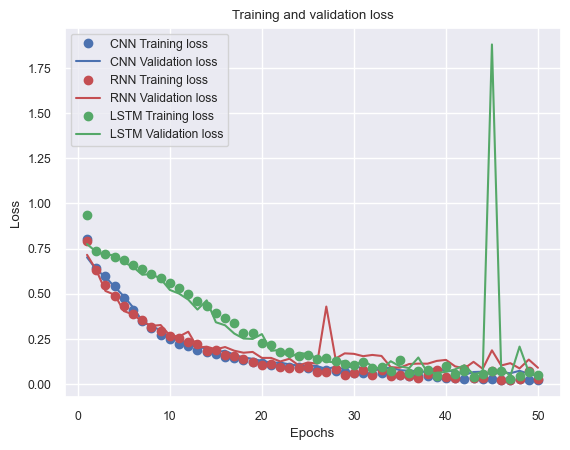

In [73]:
cnn_history = cnn_his.history
cnn_history.keys()

rnn_history = rnn_his.history
rnn_history.keys()

lstm_history = lstm_his.history
lstm_history.keys()

import matplotlib.pyplot as plt

Closs_values = cnn_history["loss"]
Cval_loss_values = cnn_history["val_loss"]

Rloss_values = rnn_history["loss"]
Rval_loss_values = rnn_history["val_loss"]

Lloss_values = lstm_history["loss"]
Lval_loss_values = lstm_history["val_loss"]

epochs = range(1, 51)
plt.plot(epochs, Closs_values, "bo", label="CNN Training loss")
plt.plot(epochs, Cval_loss_values, "b", label="CNN Validation loss")

plt.plot(epochs, Rloss_values, "ro", label="RNN Training loss")
plt.plot(epochs, Rval_loss_values, "r", label="RNN Validation loss")

plt.plot(epochs, Lloss_values, "go", label="LSTM Training loss")
plt.plot(epochs, Lval_loss_values, "g", label="LSTM Validation loss")

plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [74]:
from sklearn.metrics import accuracy_score, f1_score

def evaluate_model(model, x_test, y_test):
    # 테스트 데이터에서 예측 수행
    y_pred = model.predict(x_test)

    # 예측된 확률을 클래스 레이블로 변환
    y_pred_labels = np.argmax(y_pred, axis=1)

    # 정확도 계산
    accuracy = accuracy_score(y_test, y_pred_labels)

    # F1 스코어 계산
    f1 = f1_score(y_test, y_pred_labels, average='weighted')
   
    print(f"정확도: {accuracy * 100:.2f}%")
    print(f"F1 스코어: {f1 * 100:.2f}%")


# 모델을 사용하여 평가
print('CNN')
evaluate_model(best_cnn, x_test, y_test)

print('RNN')
evaluate_model(best_rnn, x_test, y_test)

print('LSTM')
evaluate_model(best_lstm, x_test, y_test)


CNN
11/11 [==============================] - 0s 1ms/step
정확도: 98.27%
F1 스코어: 98.27%
RNN
11/11 [==============================] - 0s 2ms/step
정확도: 96.53%
F1 스코어: 96.67%
LSTM
11/11 [==============================] - 0s 2ms/step
정확도: 98.84%
F1 스코어: 98.82%
